# Data Science MKR

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Config

In [4]:
np.random.seed(1)
plt.rcParams["figure.figsize"] = (20, 8)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.3f}".format

## Parameters

In [5]:
PARAM_selection_size = 1000

PARAM_normal_mean = 0
PARAM_normal_std = 5

PARAM_max_test_pow = 11

## Functions

In [6]:
def describe_all(_data, trend_column):
    """Prints stats of all data in dictionary"""
    # create df
    df = pd.DataFrame(_data)
    # remove trend from other data
    trend_data = df[trend_column].copy()
    for column in df.columns:
            df[column] = df[column] - trend_data
    # find stats and calc var
    stats = df.describe()
    stats.loc["var"] = stats.loc["std"] ** 2
    return stats

In [7]:
def lsm(y, pol_pow):
    """
    LSM
    y - 1d array of values,
    pol_pow - polynomial power of model
    """
    # Reshape y to row vector
    Y = y.reshape(-1, 1)
    # Creating F matrix, 1, x, x^2, ..., x^PARAM_max_pow
    F = np.ones((len(y), pol_pow + 1))
    for i in range(1, pol_pow + 1):
        # pow
        F[:, i] = np.power(np.arange(0, len(y)), i)
    # calculations
    FT = F.T
    FF = np.dot(FT, F)
    FFI = np.linalg.inv(FF)
    FFIFT = np.dot(FFI, FT)
    C = np.dot(FFIFT, Y)
    result = np.dot(F, C)
    # returning array, reshaped from row vector to 1d
    return result.reshape(-1)

## Errors

In [8]:
# normal error
_normal = np.random.normal(PARAM_normal_mean, PARAM_normal_std, PARAM_selection_size)

## Data

In [9]:
data = {}

# quadratic, + noise, + anomalies
data["quadratic"] = np.square(np.linspace(0, 10, PARAM_selection_size))
data["quadratic_normal"] = data["quadratic"].copy() + _normal

describe_all(data, "quadratic")

,quadratic,quadratic_normal
count,"1,000.000","1,000.000"
mean,0.000,0.194
std,0.000,4.907
min,0.000,-15.269
25%,0.000,-3.001
50%,0.000,0.206
75%,0.000,3.520
max,0.000,19.793
var,0.000,24.083


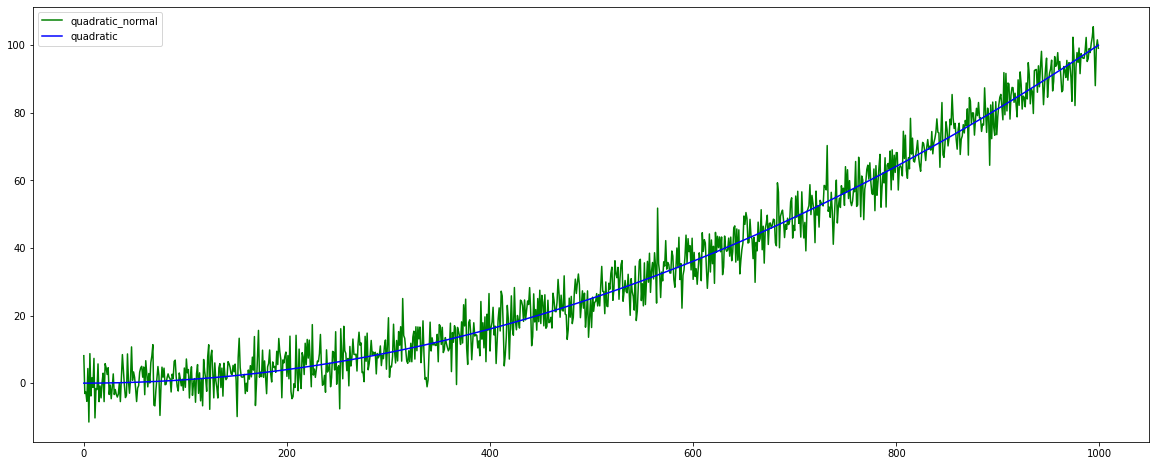

In [10]:
plt.plot(data["quadratic_normal"], label="quadratic_normal", c="green")
plt.plot(data["quadratic"], label="quadratic", c="blue")
plt.legend()
plt.show()

## Finding optimal polynomial power for smoothing

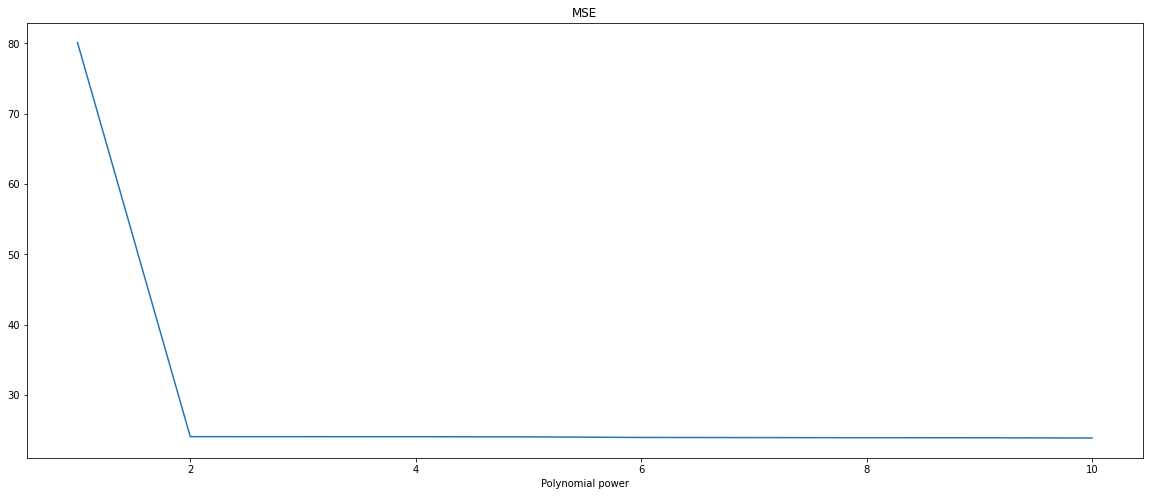

In [11]:
errs = []
pow_range = range(1, PARAM_max_test_pow)
for power in pow_range:
    errs.append((np.square(data["quadratic_normal"] - lsm(data["quadratic_normal"], power))).mean())

plt.title("MSE")
plt.xlabel("Polynomial power")
plt.plot(pow_range, errs)
plt.show()

In [12]:
data["quadratic_normal_lsm"] = lsm(data["quadratic_normal"], 2)

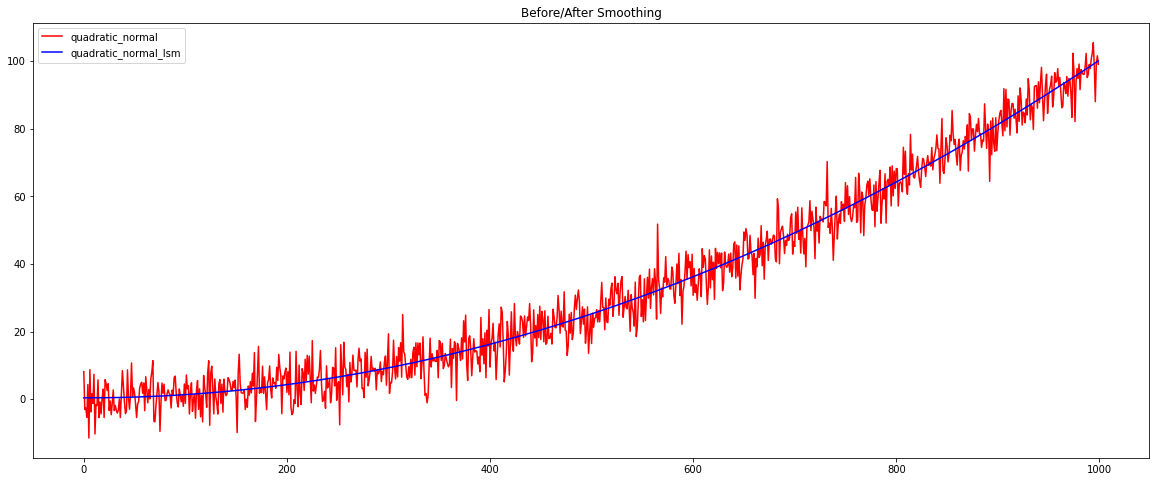

In [17]:
plt.plot(data["quadratic_normal"], label="quadratic_normal", c="red")
plt.plot(data["quadratic_normal_lsm"], label="quadratic_normal_lsm", c="blue")
plt.title("Before/After Smoothing")
plt.legend()
plt.show()

## Data Stats

In [18]:
describe_all(data, "quadratic")

,quadratic,quadratic_normal,quadratic_normal_lsm
count,"1,000.000","1,000.000","1,000.000"
mean,0.000,0.194,0.194
std,0.000,4.907,0.090
min,0.000,-15.269,0.082
25%,0.000,-3.001,0.113
50%,0.000,0.206,0.174
75%,0.000,3.520,0.265
max,0.000,19.793,0.386
var,0.000,24.083,0.008


## Hist

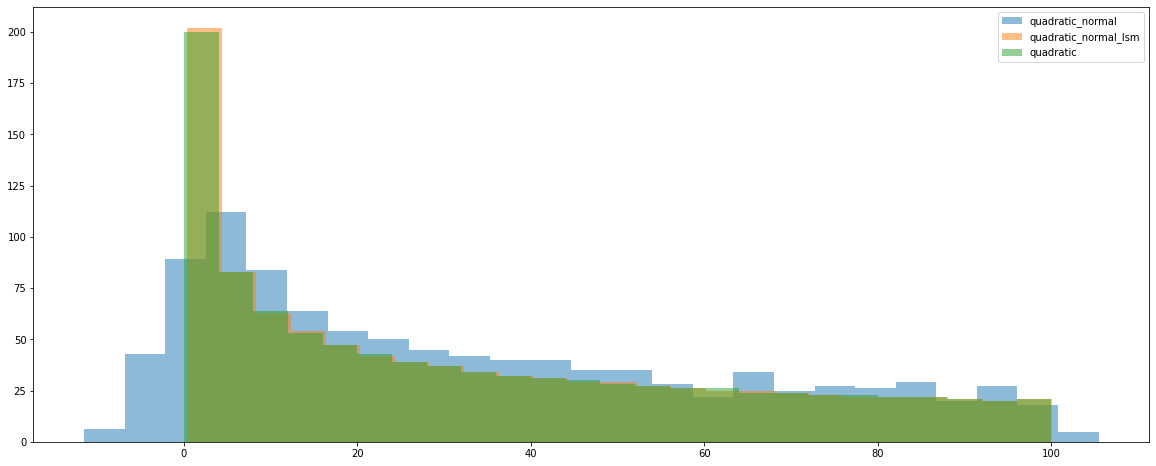

In [19]:
plt.hist(data["quadratic_normal"], bins=25, alpha=0.5, label="quadratic_normal")
plt.hist(data["quadratic_normal_lsm"], bins=25, alpha=0.5, label="quadratic_normal_lsm")
plt.hist(data["quadratic"], bins=25, alpha=0.5, label="quadratic")
plt.legend()
plt.show()